In [122]:
%pylab inline
import numpy as np
import matplotlib.image as mpimg
from scipy.sparse import  lil_matrix
from utils import img_utils

Populating the interactive namespace from numpy and matplotlib


In [121]:
reload(img_utils)

<module 'utils.img_utils' from 'utils/img_utils.py'>

In [27]:
img=mpimg.imread('/user/lgomez/home/workspace/iqt/img/bug.png')
img.shape

(375, 500, 3)

(252, 300, 6)


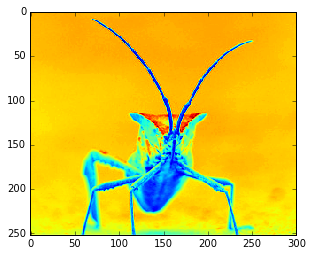

In [120]:
# Para que sea divisible por 2 y por 3
I = np.zeros((252,300,6))
I[:,:,0:2] = img[50:302,100:400,:2]
I[:,:,2:4] = img[50:302,100:400,:2]
I[:,:,4:6] = img[50:302,100:400,:2]
 
imshow((I[:,:,1]+I[:,:,0])/2, interpolation='None')
nx, ny, nz = I.shape
print I.shape

# Con factor 2

In [125]:
#Id = D.dot(np.rot90(I).T.reshape(-1)).reshape((nx/2, ny/2, nz/2))
nx,ny,nz = I.shape
D = img_utils.buildDownsamplig(nx,ny,nz, 2)
print D.shape
Id = D.dot(I.reshape(-1)).reshape((nx/2, ny/2, nz/2))

(56700, 453600)


((252, 300, 6), '--->', (126, 150, 3))

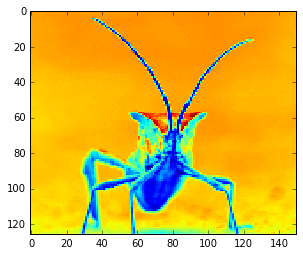

In [130]:
imshow(Id[:,:,0], interpolation='None')
I.shape, '--->', Id.shape

## Con factor 3


In [134]:
nx,ny,nz = I.shape
D = img_utils.buildDownsamplig(nx,ny,nz, 3)
Id = D.dot(I.reshape(-1)).reshape((nx/3, ny/3, nz/3))

(252, 300, 6) ---> (63, 75, 1)


(63, 75, 1)

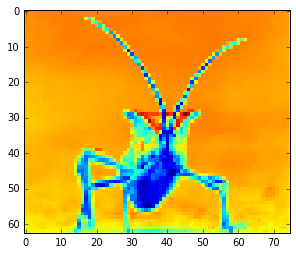

In [137]:
imshow(Id[:,:,0], interpolation='None')
print I.shape, '--->', Id.shape

# Con factor 5 (aunque no sea divisible)

In [138]:
nx,ny,nz = I.shape
D = img_utils.buildDownsamplig(nx,ny,nz, 5)
Id = D.dot(I.reshape(-1)).reshape((nx/5, ny/5, nz/5))

(252, 300, 6) ---> (50, 60, 1)


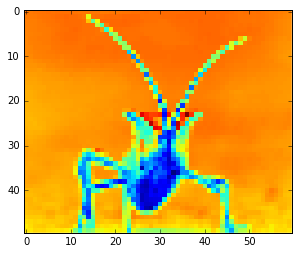

In [139]:
imshow(Id[:,:,0], interpolation='None')
print I.shape, '--->', Id.shape

(22500, 180000)


(50, 50)

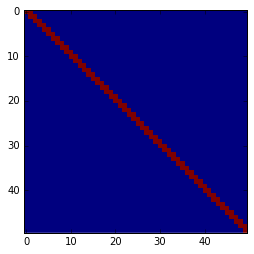

In [24]:
print D.shape
despl=150
dib = D[0:50,0:50]
imshow(dib.toarray(), interpolation='None')
dib.shape

(4, 4, 4) (8, 64) (2, 2, 2)
[[ 1.   2. ]
 [ 1.5  2.5]]
[[ 1.  1.  1.  3.]
 [ 1.  1.  5.  7.]
 [ 1.  3.  1.  3.]
 [ 5.  7.  5.  7.]]
[[ 1.  1.  1.  3.]
 [ 1.  1.  5.  7.]
 [ 1.  3.  1.  3.]
 [ 5.  7.  5.  7.]]


[[ 3.    3.5 ]
 [ 3.25  3.75]]
[[ 2.  4.  2.  4.]
 [ 6.  8.  6.  8.]
 [ 2.  4.  2.  4.]
 [ 6.  8.  6.  8.]]
[[ 2.  4.  2.  4.]
 [ 6.  8.  6.  8.]
 [ 2.  4.  2.  4.]
 [ 6.  8.  6.  8.]]


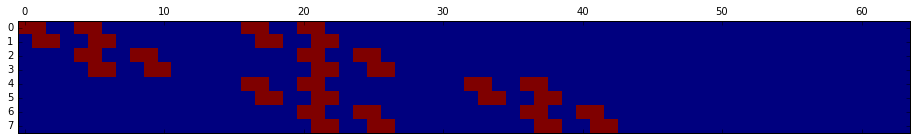

In [31]:
a = np.array([[[1,2],[3,4]],[[5,6],[7,8]]])
A = np.ones((4,4,4))
#A[0:2,0:2,0:2] = a
A[0:2,0:2,2:4] = a
A[0:2,2:4,0:2] = a
A[0:2,2:4,2:4] = a
A[2:4,0:2,0:2] = a
A[2:4,0:2,2:4] = a
A[2:4,2:4,0:2] = a
A[2:4,2:4,2:4] = a

A[:,:,1]=A[:,:,0]
A[:,:,2]=A[:,:,3]

nx,ny,nz = A.shape
d = buildDownsamplig(nx,ny,nz)       
Ad = d.dot(A.reshape(-1)).T.reshape(2,2,2)
print A.shape, d.shape, Ad.shape


print Ad[:,:,0]
print A[:,:,0]
print A[:,:,1]

print 
print 
print Ad[:,:,1]
print A[:,:,2]
print A[:,:,3]

#imshow(Ad[:,:,0], interpolation='none')
matshow(d.toarray())


(4, 4, 2) (4, 32) (2, 2, 1)
[[ 1.375  2.125]
 [ 2.375  3.125]]
[[ 1.  1.  1.  3.]
 [ 1.  1.  5.  7.]
 [ 1.  3.  1.  3.]
 [ 5.  7.  5.  7.]]
[[ 1.  1.  2.  4.]
 [ 1.  1.  6.  8.]
 [ 2.  4.  2.  4.]
 [ 6.  8.  6.  8.]]
[ 1.  1.  1.  1.  1.  2.  3.  4.  1.  1.  1.  1.  5.  6.  7.  8.  1.  2.
  3.  4.  1.  2.  3.  4.  5.  6.  7.  8.  5.  6.  7.  8.]


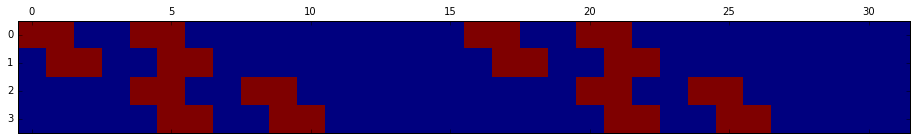

In [52]:
a = np.array([[[1,2],[3,4]],[[5,6],[7,8]]])
A = np.ones((4,4,2))
#A[0:2,0:2,0:2] = a
A[0:2,2:4,0:2] = a
A[2:4,0:2,0:2] = a
A[2:4,2:4,0:2] = a

nx,ny,nz = A.shape
d = buildDownsamplig(nx,ny,nz)       
Ad = d.dot(A.flatten()).T.reshape(2,2,1)
print A.shape, d.shape, Ad.shape


print Ad[:,:,0]

#imshow(Ad[:,:,0], interpolation='none')
matshow(d.toarray())
print(A[..., 0])
print(A[..., 1])
print(A.flatten())

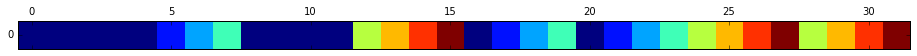

In [62]:
matshow(A.flatten()[:, None].T)

In [59]:
I, J, K = mgrid[0:4, 0:4, 0:2]
np.c_[I.flatten(), J.flatten(), K.flatten()]

array([[0, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 1],
       [0, 2, 0],
       [0, 2, 1],
       [0, 3, 0],
       [0, 3, 1],
       [1, 0, 0],
       [1, 0, 1],
       [1, 1, 0],
       [1, 1, 1],
       [1, 2, 0],
       [1, 2, 1],
       [1, 3, 0],
       [1, 3, 1],
       [2, 0, 0],
       [2, 0, 1],
       [2, 1, 0],
       [2, 1, 1],
       [2, 2, 0],
       [2, 2, 1],
       [2, 3, 0],
       [2, 3, 1],
       [3, 0, 0],
       [3, 0, 1],
       [3, 1, 0],
       [3, 1, 1],
       [3, 2, 0],
       [3, 2, 1],
       [3, 3, 0],
       [3, 3, 1]])

In [65]:
K

array([[[0, 1],
        [0, 1],
        [0, 1],
        [0, 1]],

       [[0, 1],
        [0, 1],
        [0, 1],
        [0, 1]],

       [[0, 1],
        [0, 1],
        [0, 1],
        [0, 1]],

       [[0, 1],
        [0, 1],
        [0, 1],
        [0, 1]]])

In [54]:
a = np.array([[[1,2],[3,4]],[[5,6],[7,8]]])
A = np.chararray((4,4,2),itemsize=5)
print A.shape
nx, ny, nz = A.shape
for i in range(0,nx):
    for j in range(0,ny):
        for k in range(0,nz):
            #print str(i)+','+str(j)+','+str(k)
            A[i][j][k] = str(i)+','+str(j)+','+str(k)
            
print A.reshape(-1)
print A.reshape(-1).reshape(A.shape)
print "===="
print A


(4, 4, 2)
['0,0,0' '0,0,1' '0,1,0' '0,1,1' '0,2,0' '0,2,1' '0,3,0' '0,3,1' '1,0,0'
 '1,0,1' '1,1,0' '1,1,1' '1,2,0' '1,2,1' '1,3,0' '1,3,1' '2,0,0' '2,0,1'
 '2,1,0' '2,1,1' '2,2,0' '2,2,1' '2,3,0' '2,3,1' '3,0,0' '3,0,1' '3,1,0'
 '3,1,1' '3,2,0' '3,2,1' '3,3,0' '3,3,1']
[[['0,0,0' '0,0,1']
  ['0,1,0' '0,1,1']
  ['0,2,0' '0,2,1']
  ['0,3,0' '0,3,1']]

 [['1,0,0' '1,0,1']
  ['1,1,0' '1,1,1']
  ['1,2,0' '1,2,1']
  ['1,3,0' '1,3,1']]

 [['2,0,0' '2,0,1']
  ['2,1,0' '2,1,1']
  ['2,2,0' '2,2,1']
  ['2,3,0' '2,3,1']]

 [['3,0,0' '3,0,1']
  ['3,1,0' '3,1,1']
  ['3,2,0' '3,2,1']
  ['3,3,0' '3,3,1']]]
====
[[['0,0,0' '0,0,1']
  ['0,1,0' '0,1,1']
  ['0,2,0' '0,2,1']
  ['0,3,0' '0,3,1']]

 [['1,0,0' '1,0,1']
  ['1,1,0' '1,1,1']
  ['1,2,0' '1,2,1']
  ['1,3,0' '1,3,1']]

 [['2,0,0' '2,0,1']
  ['2,1,0' '2,1,1']
  ['2,2,0' '2,2,1']
  ['2,3,0' '2,3,1']]

 [['3,0,0' '3,0,1']
  ['3,1,0' '3,1,1']
  ['3,2,0' '3,2,1']
  ['3,3,0' '3,3,1']]]


In [105]:
def buildDownsamplig(nx,ny,nz):
    new_nx = nx/2
    new_ny = ny/2
    new_nz = nz/2
    D = lil_matrix((new_nx*new_ny*new_nz, nx*ny*nz,))
    avg=0.125
    
    conv_pos = lambda i,j,k: i*ny*nz + j*nz+ k
    conv_pos_new = lambda i,j,k: i*new_ny*new_nz + j*new_nz + k
    
    for i in range(0,new_nx):
        for j in range(0,new_ny):
            for k in range(0,new_nz):
                row = conv_pos_new(i,j,k)
                ii, jj, kk = 2*i,2*j,2*k
                row00 = conv_pos(ii,jj,kk)
                row01 = conv_pos(ii,jj+1,kk)
                row10 = conv_pos(ii+1,jj,kk)
                row11 = conv_pos(i+1,jj+1,kk)
                D[row, row00:row00+2] = avg
                D[row, row01:row01+2] = avg
                D[row, row10:row10+2] = avg
                D[row, row11:row11+2] = avg
    return D

In [10]:
import numpy as np
a = np.ones((2,3), dtype='float16')
a[1,1]=65462722.34
a[1,2]= 3.4556

np.save('./resultados/a', a)


In [11]:
b = np.load('./resultados/a.npy')

print b, b.dtype

[[ 1.          1.          1.        ]
 [ 1.                 inf  3.45507812]] float16
